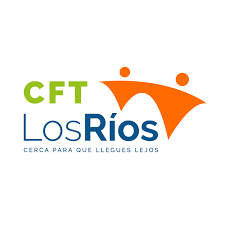

# Guía de programación básica en Python

## Curso: Fundamentos para Data Science Vespertino
## Profesor: Diego Miranda Olavarría

In [ ]:
import pandas as pd

In [2]:
data = pd.read_csv("titanic3.csv")

# 5 puntos

In [3]:
data.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [4]:
data.head()

# Para mostrar las 10 primeras filas usted debe colocar el número entre paréntesis ejm: data.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
data1 = data # Creamos una copia de nuestra data para no corromper el dataframe original

data1["body"] = pd.to_numeric(data1["body"]) # Con este código convertimos variables object a float
data1.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

### Detección valores faltantes o nulos (NaN)

#### Por que faltan valores en un dataframe:
* La base de datos está corrupta (Incompatibilidad de los datos)
* Recolección de los datos

In [6]:
pd.isnull(data) # Devuelve True o False 

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,False,False,False,False,False,False,False,False,False,True,False,True,False,True
1305,False,False,False,False,True,False,False,False,False,True,False,True,True,True
1306,False,False,False,False,False,False,False,False,False,True,False,True,False,True
1307,False,False,False,False,False,False,False,False,False,True,False,True,True,True


In [7]:
data.isnull().sum() # Suma los valores faltantes por cada columna

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [8]:
data["age"].isnull().sum() # Suma los valores faltantes de una columna específica

263

In [9]:
pd.isnull(data["age"]).values.ravel().sum() # Suma los valores faltantes de una columna específica con la librería Pandas

263

In [10]:
pd.notnull(data["age"]).values.ravel().sum() # Suma los valores no faltantes de una columna específica con la librería Pandas

1046

### Imputar datos mediante la función mean (promedio)

In [17]:
data1 = data

data1 = data1["body"].fillna(data["body"].mean())


0    160.809917
1    160.809917
2    160.809917
3    135.000000
4    160.809917
Name: body, dtype: float64

In [18]:
data1.head()

0    160.809917
1    160.809917
2    160.809917
3    135.000000
4    160.809917
Name: body, dtype: float64

### Imputar datos mediante la función ffill (forward fill, fila de adelante)

In [12]:
data2 = data
data2 = data2["body"].fillna(data["body"].ffill())

0         NaN
1         NaN
2         NaN
3       135.0
4       135.0
        ...  
1304    328.0
1305    328.0
1306    304.0
1307    304.0
1308    304.0
Name: body, Length: 1309, dtype: float64

### Imputar datos mediante la funcion bfill (back fill, fila de atrás)

In [13]:
data3 = data
data3["body"].fillna(data["body"].bfill())

0       135.0
1       135.0
2       135.0
3       135.0
4        22.0
        ...  
1304    328.0
1305    304.0
1306    304.0
1307      NaN
1308      NaN
Name: body, Length: 1309, dtype: float64

### Borrar datos faltantes

In [14]:
data4 = data

data4 = data4.dropna(axis=0, how="all") # Borra las filas que contengan todas las columnas NaN
data4.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [15]:
data5 = data
data5 = data5.dropna(axis=0,how="any") # Borra todas las filas que contengan al menos 1 NaN
data5.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
